In [5]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import AxionFuncs
import Like

# Generate Tabulated spectra
nm = 10000
m_vals = logspace(-4.0,2e0,nm)
E_max = 20.0
E0= 50.0e-3
nE_bins = 100 
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable(m_vals,E0,E_max,nE_bins,nfine=500,res_on=False) 


AttributeError: 'module' object has no attribute 'MassDiscoveryLimit'

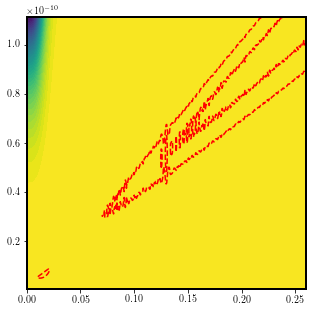

In [23]:
m_DL_vals = [3e-3,8e-3,2e-2,1.3e-1]
DL =  Like.MassDiscoveryLimit_Simple(m_vals,R1_tab,R0,m_DL_vals)


err_m = [1,1,1,1]
err_g = [0.01,0.3,0.6,0.99]
Lmin = [-1000,-1000,-1000,-1000]
Lmax = [100,100,100,100]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

isel = 3
m0 = m_DL_vals[isel]
g0 = DL[isel]


nL = 500
N_obs = Like.InterpExpectedEvents(g0,m0,m_vals,R1_tab)
mi = linspace(m_vals[1],(m0*(1+err_m[isel])),nL)
gi = linspace(g0*(1-err_g[isel]),g0*(1+err_g[isel]),nL)
LL = zeros(shape=(nL,nL))
for ii in range(0,nL):
    for jj in range(0,nL):
        m = mi[jj]
        g = gi[ii]
        LL[ii,jj] = Like.llhood2([log10(g),m],N_obs,m_vals,R1_tab)
LL = -2*(LL-LL.min())

Lprof_m = zeros(shape=nL)
Lprof_g = zeros(shape=nL)
for i in range(0,nL):
    imin = argmax(LL[i,:])
    jmin = argmax(LL[:,i])
    Lprof_g[i] = LL[i,jmin]
    Lprof_m[i] = Like.llhood2_marg(mi[i],N_obs,m_vals,R1_tab)
Lprof_m = -2*(Lprof_m-Lprof_m.min())
plt.contourf(mi,gi,LL,50)
plt.contour(mi,gi,LL,levels = [-6.2,-2.3],colors="Red")

plt.show()


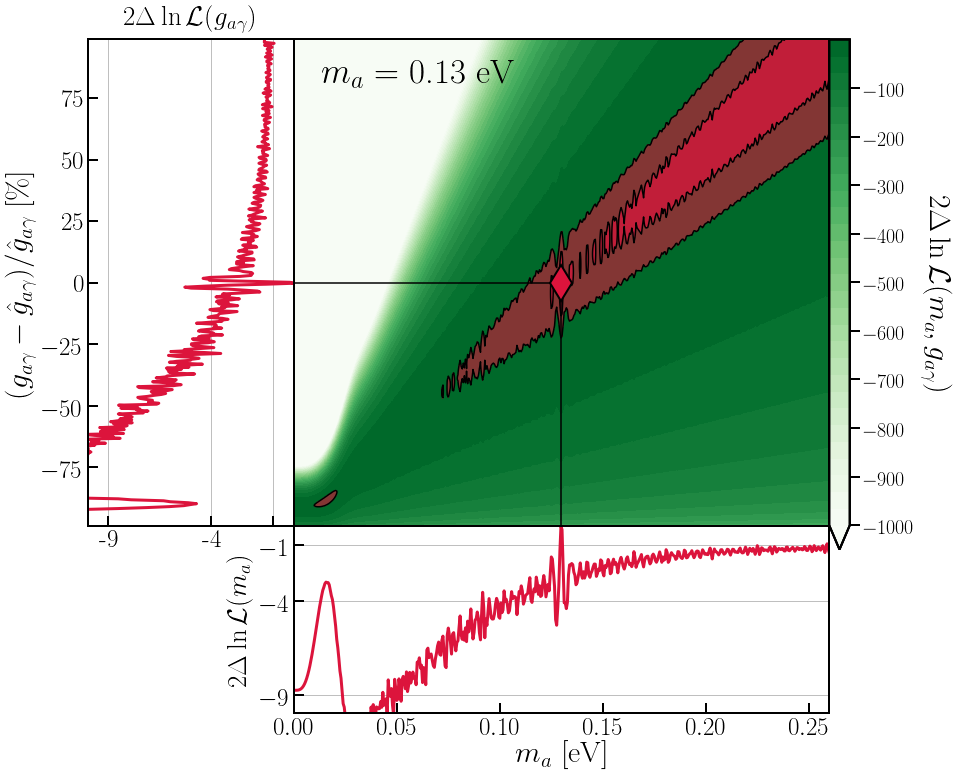

In [24]:
from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator
import matplotlib.colors as colors

markerz = ['o','s','^','d']


y = 100*(gi-g0)/g0

# plot the result
fig = plt.figure(figsize=(14.3, 13))
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 30

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


# define axes
width_main = 0.52
height_main = 0.52
width_cb = 0.02
width_side = 0.2
ax_Pxy = plt.axes((width_side, width_side, width_main, height_main))
ax_Px = plt.axes((width_side,0, width_main, width_side))
ax_Py = plt.axes((0,width_side, width_side, height_main))
ax_cb = plt.axes((width_side+width_main, width_side-0.025, width_cb, height_main+0.025))

# draw the joint probability
plt.axes(ax_Pxy)
cmap = plt.get_cmap('Greens')
new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=0, b=0.9),
        cmap(linspace(0, 0.9, 100)))
plt.contourf(mi,y,(LL),linspace(Lmin[isel],0,30),cmap=new_cmap,extend='min')
plt.contourf(mi,y,(LL),linspace(Lmin[isel],0,30),cmap=new_cmap,extend='min')
plt.contourf(mi,y,(LL),linspace(Lmin[isel],0,30),cmap=new_cmap,extend='min')
plt.plot([m0,m0],[y[0],0],'k-')
plt.plot([mi[0],m0],[0,0],'k-')
plt.plot(m0,0,markerz[isel],color='Crimson',markersize=25,markeredgecolor='k',markeredgewidth=2)
plt.text(mi[0]+0.05*(mi[-1]-mi[0]),y[0]+0.9*(y[-1]-y[0]),r'$m_a = $ '+str(m_DL_vals[isel])+' eV',fontsize=35)

cb = plt.colorbar(cax=ax_cb)
cb = plt.colorbar(cax=ax_cb)
cb = plt.colorbar(cax=ax_cb,ticks=arange(-1000,0,100))
cb.set_label(r'$2 \Delta \ln \mathcal{L}(m_a,g_{a\gamma})$',labelpad=35,rotation=-90)

# Draw extra contour lines
plt.axes(ax_Pxy)
plt.contourf(mi,y,(LL),levels = [-6.1801,0],colors="Crimson",linestyles = 'none',alpha=0.6)
plt.contourf(mi,y,(LL),levels = [-2.2958,0],colors="Crimson",linestyles = 'none',alpha=0.7)
plt.contour(mi,y,(LL),levels = [-2.2958],colors="k",linestyles = 'solid')
plt.contour(mi,y,(LL),levels = [-6.1801],colors="k",linestyles = 'solid')

# draw p(x) distribution
ax_Px.plot(mi, Lprof_m, '-',color='Crimson',linewidth=3)

# draw p(y) distribution
ax_Py.plot(Lprof_g, y, '-',color='Crimson',linewidth=3)

# define axis limits
ax_Pxy.set_xlim(mi[0], mi[-1])
ax_Pxy.set_ylim(y[0], y[-1])
ax_Px.set_xlim(mi[0], mi[-1])
ax_Px.set_ylim(-10,0)
ax_Py.set_ylim(y[0], y[-1])
ax_Py.set_xlim(-10,0)


# label axes
ax_Px.set_xlabel(r'$m_a$ [eV]')
ax_Px.yaxis.set_label_position('left')
ax_Py.set_ylabel(r'$(g_{a\gamma}-\hat{g}_{a\gamma})/\hat{g}_{a\gamma}$ [\%]')
ax_Py.xaxis.set_label_position('top')
ax_Py.set_xlabel('$2\Delta \ln \mathcal{L}(g_{a\gamma})$',labelpad=10,fontsize=27)
ax_Px.set_ylabel('$2 \Delta \ln \mathcal{L}(m_a)$',fontsize=27)
ax_Py.set_xticks([-9,-4,-1])
ax_Py.set_xticklabels(['-9','-4',''])
ax_Px.set_yticks([-9,-4,-1])
ax_Px.yaxis.grid()
ax_Py.xaxis.grid()

ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())
ax_Py.tick_params(which='major',direction='in',width=2,length=10,labelsize=25)
ax_Px.tick_params(which='major',direction='in',width=2,length=10,labelsize=25)
ax_cb.tick_params(which='major',direction='out',width=2,length=10,labelsize=20)

plt.show()
fig.savefig('../plots/Like'+str(isel)+'.pdf',bbox_inches='tight')